# Import Dependencies 

In [1]:
import json 
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pprint
from config import api_key

# Get the specfic user ranked status 

#### Must 

In [22]:
# https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/
# WhatBrownies?api_key=RGAPI-e7acc99f-5037-4f32-9af5-ca038cea3485

# Change username to find specfic user
username = 'WhatBrownies'    
URL = 'https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/'
region = 'na1'

# Query URL
query_url = f'{URL}{username}?api_key={api_key}'
query_url

response = requests.get(query_url).json()
pprint.pprint(response)
summonerid = response['id']
accountid = response['accountId']
accountid
summonerid


{'accountId': '6qvWHdHTqDozay5XNscxbmJgSx3NEOEmLUUj-Jg4QpL8NDs',
 'id': 'a-Q-p5kn8DJm8QNGr3Jf-Rnszxv5sjw0lr_AMFT9T0A3ofU',
 'name': 'WhatBrownies',
 'profileIconId': 983,
 'puuid': '4CYuHNdagN3QZDH3Pthdmx0v77uovFHmmV-mglRPzLSfPSyEpbig_HB1oxuyiXGQnz5KJ2vEcNX5FA',
 'revisionDate': 1586244246000,
 'summonerLevel': 161}


'a-Q-p5kn8DJm8QNGr3Jf-Rnszxv5sjw0lr_AMFT9T0A3ofU'

# Get User recent games 

#### Must user users account ID from previous cell

In [12]:
lane = []
champion = []
role = []
season = []

games_url = 'https://na1.api.riotgames.com/lol/match/v4/matchlists/by-account/'

games_query_url = f'{games_url}{accountid}?api_key={api_key}'

recent_games = requests.get(games_query_url).json()
pprint.pprint(recent_games)

# print(recent_games['matches'][0]['champion'])

{'endIndex': 100,
 'matches': [{'champion': 57,
              'gameId': 3364474848,
              'lane': 'BOTTOM',
              'platformId': 'NA1',
              'queue': 1020,
              'role': 'DUO',
              'season': 13,
              'timestamp': 1586242173824},
             {'champion': 33,
              'gameId': 3364389663,
              'lane': 'TOP',
              'platformId': 'NA1',
              'queue': 1020,
              'role': 'DUO_CARRY',
              'season': 13,
              'timestamp': 1586240067866},
             {'champion': 53,
              'gameId': 3364365574,
              'lane': 'NONE',
              'platformId': 'NA1',
              'queue': 1020,
              'role': 'DUO_SUPPORT',
              'season': 13,
              'timestamp': 1586238496643},
             {'champion': 350,
              'gameId': 3364309436,
              'lane': 'JUNGLE',
              'platformId': 'NA1',
              'queue': 1020,
              'role': 'N

              'platformId': 'NA1',
              'queue': 450,
              'role': 'DUO_SUPPORT',
              'season': 13,
              'timestamp': 1582956969149},
             {'champion': 134,
              'gameId': 3306155912,
              'lane': 'MID',
              'platformId': 'NA1',
              'queue': 450,
              'role': 'DUO_SUPPORT',
              'season': 13,
              'timestamp': 1582522587055}],
 'startIndex': 0,
 'totalGames': 152}


# Create a table for user with information of most recent games 

In [13]:
number_of_games = recent_games['endIndex']
for i in range(number_of_games): 
    champion.append(recent_games['matches'][i]['champion'])
    lane.append(recent_games['matches'][i]['lane'])
    role.append(recent_games['matches'][i]['role'])
    season.append(recent_games['matches'][i]['season'])
      
      
user_dict = {
    'Champion': champion, 
    'Lane' : lane, 
    'Role' : role,
    'Season' : season
}



user_df = pd.DataFrame(data=user_dict)
user_df.count()


Champion    100
Lane        100
Role        100
Season      100
dtype: int64

In [14]:
user_df 

Champion    Lane         Role  Season
0         57  BOTTOM          DUO      13
1         33     TOP    DUO_CARRY      13
2         53    NONE  DUO_SUPPORT      13
3        350  JUNGLE         NONE      13
4         54     TOP          DUO      13
..       ...     ...          ...     ...
95       412     TOP    DUO_CARRY      13
96        55  JUNGLE         NONE      13
97        39    NONE  DUO_SUPPORT      13
98        76    NONE  DUO_SUPPORT      13
99       134     MID  DUO_SUPPORT      13

[100 rows x 4 columns]

# Create Number of games per lane for user

Text(0.5, 1.0, 'Number of Games per Lane')

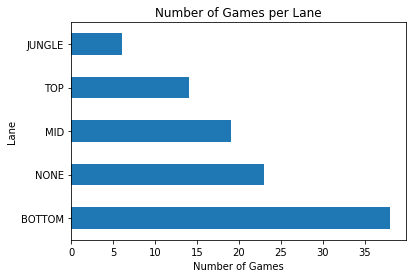

In [15]:
user_df['Lane'].value_counts().plot.barh()
plt.xlabel('Number of Games')
plt.ylabel('Lane')
plt.title('Number of Games per Lane')

# Create number of Games per Role 

Text(0.5, 1.0, 'Number of Games per Role')

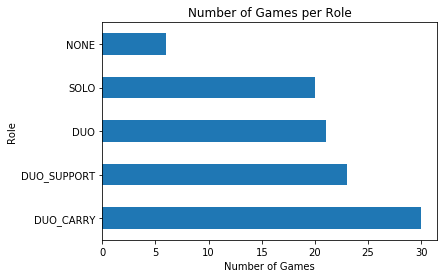

In [16]:
user_df['Role'].value_counts().plot.barh()
plt.xlabel('Number of Games')
plt.ylabel('Role')
plt.title('Number of Games per Role')

# Champion Mastery 


In [27]:
championMastery_url = f'https://{region}.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/{summonerid}?api_key={api_key}'
championMastery = requests.get(championMastery_url).json()
pprint.pprint(championMastery) 

[{'championId': 222,
  'championLevel': 7,
  'championPoints': 458294,
  'championPointsSinceLastLevel': 436694,
  'championPointsUntilNextLevel': 0,
  'chestGranted': True,
  'lastPlayTime': 1584844010000,
  'summonerId': 'a-Q-p5kn8DJm8QNGr3Jf-Rnszxv5sjw0lr_AMFT9T0A3ofU',
  'tokensEarned': 0},
 {'championId': 412,
  'championLevel': 7,
  'championPoints': 309058,
  'championPointsSinceLastLevel': 287458,
  'championPointsUntilNextLevel': 0,
  'chestGranted': True,
  'lastPlayTime': 1584828901000,
  'summonerId': 'a-Q-p5kn8DJm8QNGr3Jf-Rnszxv5sjw0lr_AMFT9T0A3ofU',
  'tokensEarned': 0},
 {'championId': 236,
  'championLevel': 7,
  'championPoints': 95742,
  'championPointsSinceLastLevel': 74142,
  'championPointsUntilNextLevel': 0,
  'chestGranted': False,
  'lastPlayTime': 1584771943000,
  'summonerId': 'a-Q-p5kn8DJm8QNGr3Jf-Rnszxv5sjw0lr_AMFT9T0A3ofU',
  'tokensEarned': 0},
 {'championId': 51,
  'championLevel': 6,
  'championPoints': 55800,
  'championPointsSinceLastLevel': 34200,
  '

  'lastPlayTime': 1570307243000,
  'summonerId': 'a-Q-p5kn8DJm8QNGr3Jf-Rnszxv5sjw0lr_AMFT9T0A3ofU',
  'tokensEarned': 0},
 {'championId': 154,
  'championLevel': 1,
  'championPoints': 991,
  'championPointsSinceLastLevel': 991,
  'championPointsUntilNextLevel': 809,
  'chestGranted': False,
  'lastPlayTime': 1585380879000,
  'summonerId': 'a-Q-p5kn8DJm8QNGr3Jf-Rnszxv5sjw0lr_AMFT9T0A3ofU',
  'tokensEarned': 0},
 {'championId': 36,
  'championLevel': 1,
  'championPoints': 968,
  'championPointsSinceLastLevel': 968,
  'championPointsUntilNextLevel': 832,
  'chestGranted': False,
  'lastPlayTime': 1580539368000,
  'summonerId': 'a-Q-p5kn8DJm8QNGr3Jf-Rnszxv5sjw0lr_AMFT9T0A3ofU',
  'tokensEarned': 0},
 {'championId': 3,
  'championLevel': 1,
  'championPoints': 942,
  'championPointsSinceLastLevel': 942,
  'championPointsUntilNextLevel': 858,
  'chestGranted': False,
  'lastPlayTime': 1579143837000,
  'summonerId': 'a-Q-p5kn8DJm8QNGr3Jf-Rnszxv5sjw0lr_AMFT9T0A3ofU',
  'tokensEarned': 0},
 {

In [35]:
champion = []
championLevel = []

for i in range(len(championMastery)):
    champion.append(championMastery[i]['championId'])
    championLevel.append(championMastery[i]['championLevel'])
    
champion_dict = {
    'Champion' : champion,
    'Champion Mastery Level' : championLevel
}    

championMastery_df = pd.DataFrame(data = champion_dict)
championMastery_df

Champion  Champion Mastery Level
0         222                       7
1         412                       7
2         236                       7
3          51                       6
4         103                       6
..        ...                     ...
119        44                       1
120       254                       1
121        50                       1
122       141                       1
123       517                       1

[124 rows x 2 columns]